# Tutorial Notebook

This notebook is best used if copied into a new directory, with all files in the same directory.

## Imports and Baseline Checks

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import be_scan
# can also import like: 
#    from be_scan.plot import plot_scatterplot

In [8]:
# checking which modules are available for which function etc
print(dir(be_scan))
print(dir(be_scan.sgrna))
print(dir(be_scan.analysis))
print(dir(be_scan.plot))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'analysis', 'plot', 'sgrna']
['DNA_to_AA', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_gene_', '_genomic_', '_guideRNA_', 'annotate_guides', 'annotate_mutations', 'calc_coding_window', 'calc_editing_window', 'calc_target', 'categorize_mutations', 'check_guides', 'complement', 'filter_guide', 'filter_repeats', 'format_mutation', 'generate_BE_guides', 'generate_guides', 'guides', 'mutation_combos', 'process_PAM', 'protein_to_AAseq', 'rev_complement']
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_sanger', 'average_reps', 'batch_process', 'compare_conds', 'count_reads', 'merge_and_norm', 'validate_cloning']
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 

In [2]:
test_dir = '../../../tests/test_data/plot_data/'
HDAC_parent_dir = '../../../../../../Downloads/HDAC_Data/'
CRAF_parent_dir = '../../../../../../Downloads/CRAF_Data/'
KBTBD4_parent_dir = '../../../../../../Downloads/KBTBD4/'
sgrna_dir = '../../../tests/test_data/sgrna_data/'

Note: all annotate_guides.csv needs information about type of mutation (Missense, Silent, Nonsense, No_A/Exon, Control) and where the edit is along the gene (integer)

In [8]:
# rennotate Megan's HDAC data
df = pd.read_csv(HDAC_parent_dir + 'annotated_HDAC1_ABE.csv')
df['Mut_type'] = np.where(df['Mutation category.x'].str.contains('Missense'), 'Missense', 
                 np.where(df['Mutation category.x'].str.contains('Silent'), 'Silent', 
                 np.where(df['Mutation category.x'].isnull(), 'No_A/Exon', 
                 'Control')))
df['Edit_site'] = np.where(df['Amino_acid_edit'].isnull(), -1, df['Amino_acid_edit'])
df.to_csv(HDAC_parent_dir + 'XYH_annotated_HDAC1_ABE.csv')


regex_edit = r'(\d+)(\w+)'

# rennotate Megan's KBTBD4 data
df = pd.read_csv(KBTBD4_parent_dir + 'sgRNA_KBTBD4_ABE.csv') # Missense, silent, control
df['Mut_type'] = np.where((df['ABE_Mutation_category'].str.contains('Missense')) & (df['# edits']>0), 'Missense', 
                 np.where((df['ABE_Mutation_category'].str.contains('Silent')) & (df['#silent edits']>0), 'Silent', 
                 np.where((df['# edits']==0) & (df['#silent edits']==0), 'No_A/Exon', 
                 'Control')))
df['Edit_site'] = np.where(df['Mut_type'].str.contains('Missense', regex= True) | df['Mut_type'].str.contains('Silent', regex= True), df['ABE_edit'].str.extract(regex_edit)[0], -1)
df.to_csv(KBTBD4_parent_dir + 'XYH_annotated_KBTBD4_ABE.csv')

# rennotate Megan's KBTBD4 data
df = pd.read_csv(KBTBD4_parent_dir + 'sgRNA_KBTBD4_CBE.csv') # Missense, silent, control
df['Mut_type'] = np.where((df['CBE_Mutation_category'].str.contains('Missense')) & (df['# edits']>0), 'Missense', 
                 np.where((df['CBE_Mutation_category'].str.contains('Nonsense')) & (df['# edits']>0), 'Nonsense', 
                 np.where((df['CBE_Mutation_category'].str.contains('Silent')) & (df['#silent edits']>0), 'Silent', 
                 np.where((df['# edits']==0) & (df['#silent edits']==0), 'No_C/Exon', 
                 'Control'))))
df['Edit_site'] = np.where(df['Mut_type'].str.contains('Missense', regex= True) | df['Mut_type'].str.contains('Silent', regex= True) | df['Mut_type'].str.contains('Nonsense', regex= True), df['CBE_edit'].str.extract(regex_edit)[0], -1)
df.to_csv(KBTBD4_parent_dir + 'XYH_annotated_KBTBD4_CBE.csv')

# if contains missense then missense, elif contains silent then silent, NaN is No_AC/Exon, else UTR Intron splice-donor splice-acceptor control

## Unit Testing Function Calls

### be_scan.sgrna

In [3]:
from be_scan.sgrna import generate_BE_guides
from be_scan.sgrna import check_guides
from be_scan.sgrna import annotate_guides
from be_scan.sgrna import guides

In [4]:
generate_BE_guides(gene_filepath = sgrna_dir + "230408_AR_Input.fasta", 
                   cas_type      = "SpG", 
                   edit_from     = "C", 
                   edit_to       = "T",
                   gene_name     = "AR"
                   )

Create gene object from ../../../tests/test_data/sgrna_data/230408_AR_Input.fasta
Parsing exons: 8 exons found
Preprocessing sucessful


,sgRNA_seq,starting_frame,gene_pos,chr_pos,exon,coding_seq,sgRNA_strand,gene_strand,gene
0,AAGTGCAGTTAGGGCTGGGAAGG,1,4,67545151,0,AAGTGCAGTTAGGGCTGGGAAGG,sense,plus,AR
1,AGTGCAGTTAGGGCTGGGAAGGG,2,5,67545152,0,AGTGCAGTTAGGGCTGGGAAGGG,sense,plus,AR
2,GTGCAGTTAGGGCTGGGAAGGGT,0,6,67545153,0,GTGCAGTTAGGGCTGGGAAGGGT,sense,plus,AR
3,AAGGGTCTACCCTCGGCCGCCGT,2,23,67545170,0,AAGGGTCTACCCTCGGCCGCCGT,sense,plus,AR
4,CTACCCTCGGCCGCCGTCCAAGA,2,29,67545176,0,CTACCCTCGGCCGCCGTCCAAGA,sense,plus,AR
...,...,...,...,...,...,...,...,...,...
1259,CTTTCCCAGAAAGGATCTTGGGC,0,2733,67723812,7,GCCCAAGATCCTTTCTGGGAAAG,antisense,plus,AR
1260,ACTTTCCCAGAAAGGATCTTGGG,1,2734,67723813,7,CCCAAGATCCTTTCTGGGAAAGT,antisense,plus,AR
1261,GACTTTCCCAGAAAGGATCTTGG,2,2735,67723814,7,CCAAGATCCTTTCTGGGAAAGTC,antisense,plus,AR
1262,GGGCTTGACTTTCCCAGAAAGGA,2,2741,67723820,7,TCCTTTCTGGGAAAGTCAAGCCC,antisense,plus,AR


In [5]:
# this function takes about a minute to run independent of library size
check_guides(guides_file  = "guides.csv",
            #  genome_file  = "../../../tests/ref_data/sample.fna",
             genome_file  = "../../../../reference_genomes/GCF_000001405.26/ncbi_dataset/data/GCF_000001405.26/GCF_000001405.26_GRCh38_genomic.fna",
             )

40116757 lines processed from ../../../../reference_genomes/GCF_000001405.26/ncbi_dataset/data/GCF_000001405.26/GCF_000001405.26_GRCh38_genomic.fna


,sgRNA_seq,starting_frame,gene_pos,chr_pos,exon,coding_seq,sgRNA_strand,gene_strand,gene,genome_occurrences
0,AAGTGCAGTTAGGGCTGGGAAGG,1,4,67545151,0,AAGTGCAGTTAGGGCTGGGAAGG,sense,plus,AR,1
1,AGTGCAGTTAGGGCTGGGAAGGG,2,5,67545152,0,AGTGCAGTTAGGGCTGGGAAGGG,sense,plus,AR,1
2,GTGCAGTTAGGGCTGGGAAGGGT,0,6,67545153,0,GTGCAGTTAGGGCTGGGAAGGGT,sense,plus,AR,1
3,AAGGGTCTACCCTCGGCCGCCGT,2,23,67545170,0,AAGGGTCTACCCTCGGCCGCCGT,sense,plus,AR,1
4,CTACCCTCGGCCGCCGTCCAAGA,2,29,67545176,0,CTACCCTCGGCCGCCGTCCAAGA,sense,plus,AR,1
...,...,...,...,...,...,...,...,...,...,...
1001,CTTTCCCAGAAAGGATCTTGGGC,0,2733,67723812,7,GCCCAAGATCCTTTCTGGGAAAG,antisense,plus,AR,1
1002,ACTTTCCCAGAAAGGATCTTGGG,1,2734,67723813,7,CCCAAGATCCTTTCTGGGAAAGT,antisense,plus,AR,1
1003,GACTTTCCCAGAAAGGATCTTGG,2,2735,67723814,7,CCAAGATCCTTTCTGGGAAAGTC,antisense,plus,AR,1
1004,GGGCTTGACTTTCCCAGAAAGGA,2,2741,67723820,7,TCCTTTCTGGGAAAGTCAAGCCC,antisense,plus,AR,1


In [5]:
annotate_guides(guides_file    ="output.csv",
                gene_filepath  ="",
                edit_from      ="C",
                edit_to        ="T",
                protein_filepath = sgrna_dir + "P10275.fasta", 
                )

,sgRNA_seq,starting_frame,gene_pos,chr_pos,exon,coding_seq,sgRNA_strand,gene_strand,gene,genome_occurrences,editing_window,win_overlap,C_count,target_CDS,codon_window,residue_window,edit_site,mutations,muttypes,muttype
0,AAGTGCAGTTAGGGCTGGGAAGG,1,4,67545151,0,AAGTGCAGTTAGGGCTGGGAAGG,sense,plus,AR,1,"(7, 11)",Exon,1,TGCAG,GTGCAGTTA,VQL,3.0,[Q4.],[Nonsense],Nonsense
1,AGTGCAGTTAGGGCTGGGAAGGG,2,5,67545152,0,AGTGCAGTTAGGGCTGGGAAGGG,sense,plus,AR,1,"(8, 12)",Exon,1,GCAGT,GTGCAGTTA,VQL,3.0,[Q4.],[Nonsense],Nonsense
2,GTGCAGTTAGGGCTGGGAAGGGT,0,6,67545153,0,GTGCAGTTAGGGCTGGGAAGGGT,sense,plus,AR,1,"(9, 13)",Exon,1,CAGTT,CAGTTAGGG,QLG,3.0,[Q4.],[Nonsense],Nonsense
3,AAGGGTCTACCCTCGGCCGCCGT,2,23,67545170,0,AAGGGTCTACCCTCGGCCGCCGT,sense,plus,AR,1,"(26, 30)",Exon,1,GGTCT,AGGGTCTAC,RVY,9.0,[],[Silent],Silent
4,CTACCCTCGGCCGCCGTCCAAGA,2,29,67545176,0,CTACCCTCGGCCGCCGTCCAAGA,sense,plus,AR,1,"(32, 36)",Exon,4,CCCTC,TACCCTCGG,YPR,11.0,"[R13W, P12L, P12L/R13W, P12S, P12S/R13W, P12F,...","[Missense, Silent]",Mixed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,CTTTCCCAGAAAGGATCTTGGGC,0,2733,67723812,7,GCCCAAGATCCTTTCTGGGAAAG,antisense,plus,AR,1,"(2730, 2726)",Exon,3,TGGGA,TCTGGGAAA,SGK,909.0,"[, G910E, G910E, G910R, G910R, G910K, G910K]","[Missense, Silent]",Mixed
1002,ACTTTCCCAGAAAGGATCTTGGG,1,2734,67723813,7,CCCAAGATCCTTTCTGGGAAAGT,antisense,plus,AR,1,"(2731, 2727)",Exon,3,GGGAA,TCTGGGAAA,SGK,909.0,"[, G910E, G910E, G910R, G910R, G910K, G910K]","[Missense, Silent]",Mixed
1003,GACTTTCCCAGAAAGGATCTTGG,2,2735,67723814,7,CCAAGATCCTTTCTGGGAAAGTC,antisense,plus,AR,1,"(2732, 2728)",Exon,2,GGAAA,TCTGGGAAA,SGK,910.0,"[, G910E, G910E]","[Missense, Silent]",Mixed
1004,GGGCTTGACTTTCCCAGAAAGGA,2,2741,67723820,7,TCCTTTCTGGGAAAGTCAAGCCC,antisense,plus,AR,1,"(2738, 2734)",Exon,1,TCAAG,AAAGTCAAG,KVK,912.0,[],[Silent],Silent


In [6]:
guides(gene_filepath = sgrna_dir + "230408_AR_Input.fasta", 
       genome_file  = "../../../../reference_genomes/GCF_000001405.26/ncbi_dataset/data/GCF_000001405.26/GCF_000001405.26_GRCh38_genomic.fna",
       protein_filepath = sgrna_dir + "P10275.fasta", 
       cas_type      = "SpG", 
       edit_from     = "C", 
       edit_to       = "T",
       gene_name     = "AR"
       )

Create gene object from ../../../tests/test_data/sgrna_data/230408_AR_Input.fasta
Parsing exons: 8 exons found
Preprocessing sucessful
40116757 lines processed from ../../../../reference_genomes/GCF_000001405.26/ncbi_dataset/data/GCF_000001405.26/GCF_000001405.26_GRCh38_genomic.fna


,sgRNA_seq,starting_frame,gene_pos,chr_pos,exon,coding_seq,sgRNA_strand,gene_strand,gene,genome_occurrences,editing_window,win_overlap,C_count,target_CDS,codon_window,residue_window,edit_site,mutations,muttypes,muttype
0,AAGTGCAGTTAGGGCTGGGAAGG,1,4,67545151,0,AAGTGCAGTTAGGGCTGGGAAGG,sense,plus,AR,1,"(7, 11)",Exon,1,TGCAG,GTGCAGTTA,VQL,3.0,[Q4.],[Nonsense],Nonsense
1,AGTGCAGTTAGGGCTGGGAAGGG,2,5,67545152,0,AGTGCAGTTAGGGCTGGGAAGGG,sense,plus,AR,1,"(8, 12)",Exon,1,GCAGT,GTGCAGTTA,VQL,3.0,[Q4.],[Nonsense],Nonsense
2,GTGCAGTTAGGGCTGGGAAGGGT,0,6,67545153,0,GTGCAGTTAGGGCTGGGAAGGGT,sense,plus,AR,1,"(9, 13)",Exon,1,CAGTT,CAGTTAGGG,QLG,3.0,[Q4.],[Nonsense],Nonsense
3,AAGGGTCTACCCTCGGCCGCCGT,2,23,67545170,0,AAGGGTCTACCCTCGGCCGCCGT,sense,plus,AR,1,"(26, 30)",Exon,1,GGTCT,AGGGTCTAC,RVY,9.0,[],[Silent],Silent
4,CTACCCTCGGCCGCCGTCCAAGA,2,29,67545176,0,CTACCCTCGGCCGCCGTCCAAGA,sense,plus,AR,1,"(32, 36)",Exon,4,CCCTC,TACCCTCGG,YPR,11.0,"[R13W, P12L, P12L/R13W, P12S, P12S/R13W, P12F,...","[Missense, Silent]",Mixed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,CTTTCCCAGAAAGGATCTTGGGC,0,2733,67723812,7,GCCCAAGATCCTTTCTGGGAAAG,antisense,plus,AR,1,"(2730, 2726)",Exon,3,TGGGA,TCTGGGAAA,SGK,909.0,"[, G910E, G910E, G910R, G910R, G910K, G910K]","[Missense, Silent]",Mixed
1002,ACTTTCCCAGAAAGGATCTTGGG,1,2734,67723813,7,CCCAAGATCCTTTCTGGGAAAGT,antisense,plus,AR,1,"(2731, 2727)",Exon,3,GGGAA,TCTGGGAAA,SGK,909.0,"[, G910E, G910E, G910R, G910R, G910K, G910K]","[Missense, Silent]",Mixed
1003,GACTTTCCCAGAAAGGATCTTGG,2,2735,67723814,7,CCAAGATCCTTTCTGGGAAAGTC,antisense,plus,AR,1,"(2732, 2728)",Exon,2,GGAAA,TCTGGGAAA,SGK,910.0,"[, G910E, G910E]","[Missense, Silent]",Mixed
1004,GGGCTTGACTTTCCCAGAAAGGA,2,2741,67723820,7,TCCTTTCTGGGAAAGTCAAGCCC,antisense,plus,AR,1,"(2738, 2734)",Exon,1,TCAAG,AAAGTCAAG,KVK,912.0,[],[Silent],Silent


### be_scan.analysis

### be_scan.plot

Starting from Nick's DNMT3A data in the .csv format and regenerating the scatterplot, boxplot, correlation heatmap, and correlation scatterplot. 

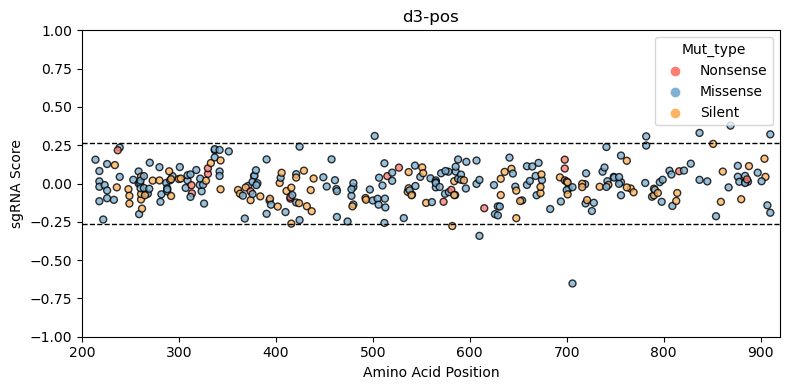

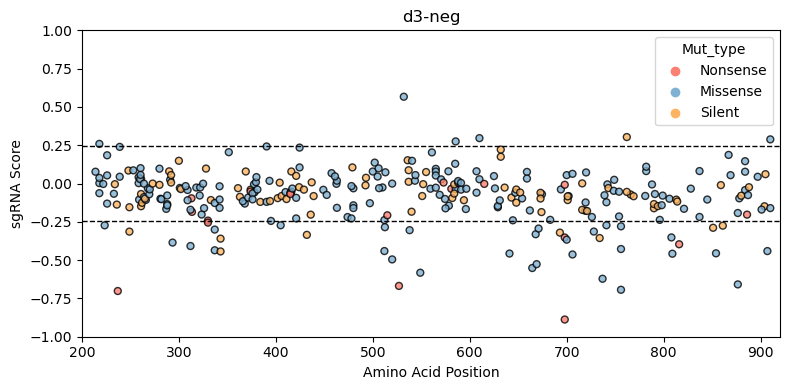

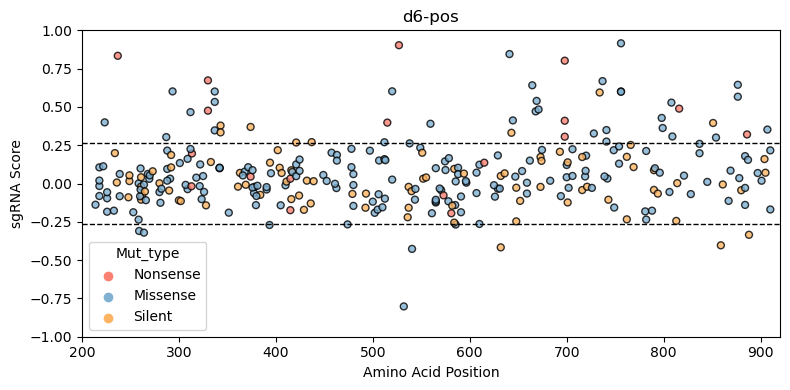

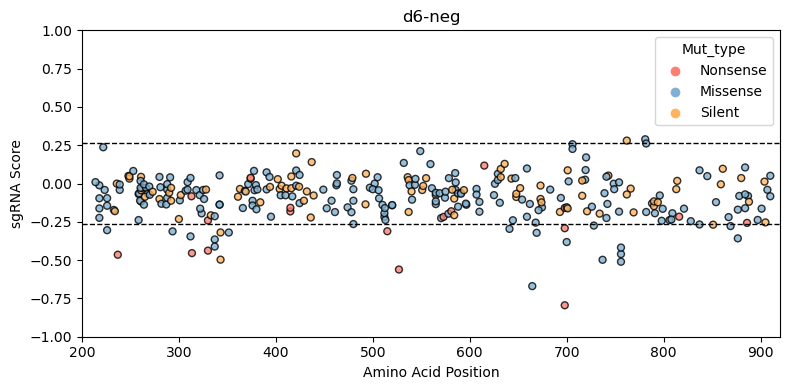

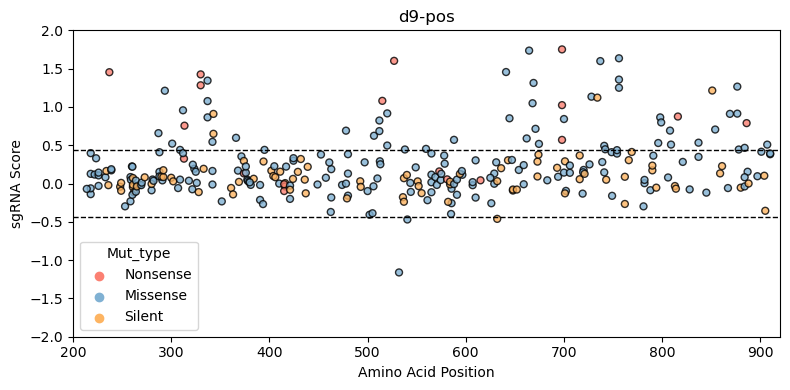

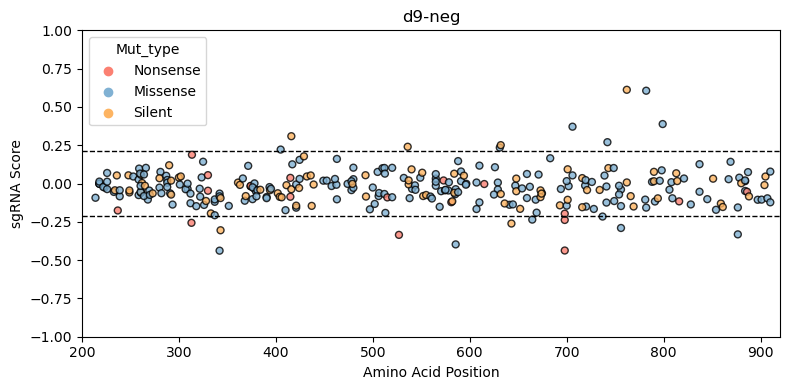

In [13]:
be_scan.plot.plot_scatterplot(df_filepath       = test_dir + 'NZL10196_v9_comparisons.csv', 
                              x_column          = 'Edit_site_3A1', 
                              y_column          = 'log2_fc', 
                              hue_column        = 'Mut_type', 
                              comparisons       = ['d3-pos', 'd3-neg', 'd6-pos', 'd6-neg', 'd9-pos', 'd9-neg'], 
                              neg_ctrl_col      = 'Gene', 
                              neg_ctrl_category = 'NON-GENE',
                              xmin              = 200, 
                              savefig           = False,
                              )

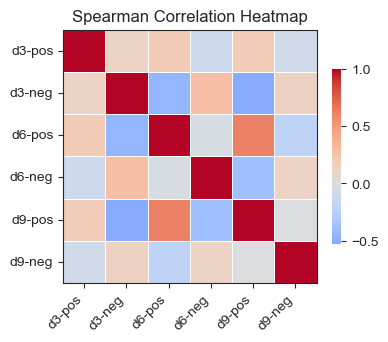

In [14]:
be_scan.plot.plot_corr_heatmap(df_filepath       = test_dir + 'NZL10196_v9_comparisons.csv', 
                               comparisons       = ['d3-pos', 'd3-neg', 'd6-pos', 'd6-neg', 'd9-pos', 'd9-neg'], 
                               savefig           = False,
                               )

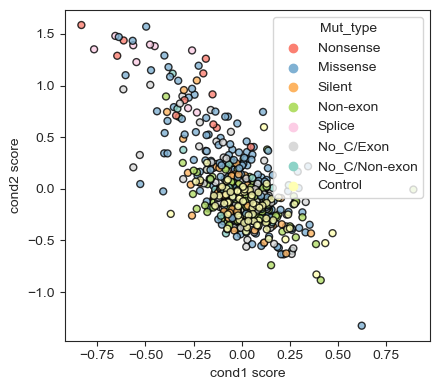

In [15]:
be_scan.plot.plot_corr_scatterplot(df_filepath = test_dir + 'NZL10196_v9_comparisons.csv', 
                                   condition1  = 'd3-neg', 
                                   condition2  = 'd9-pos', 
                                   hue_column  = 'Mut_type',
                                   savefig     = False,
                                   )

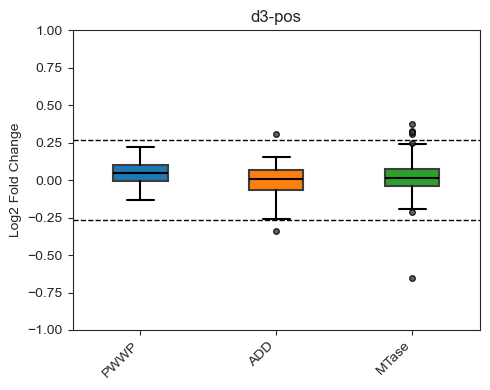

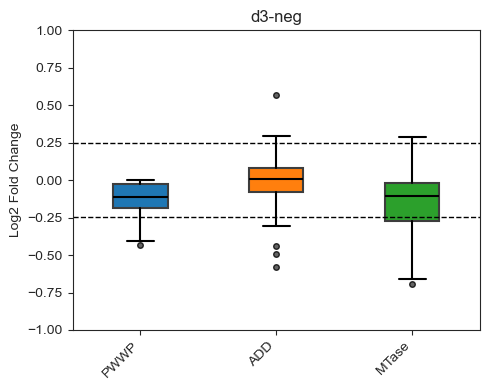

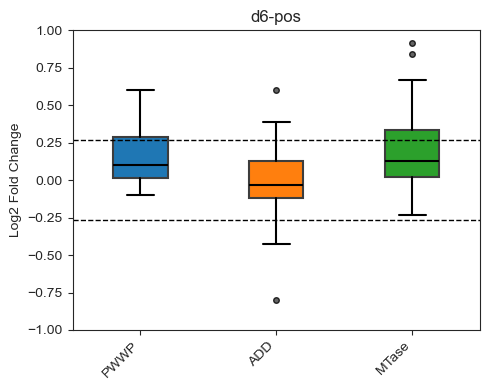

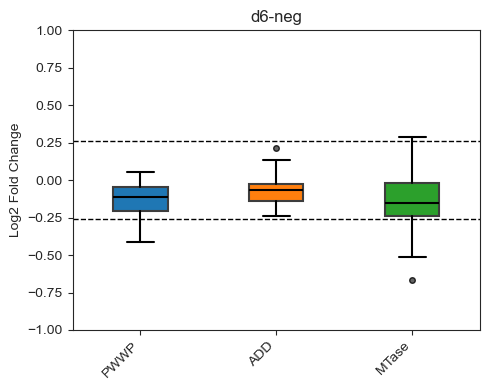

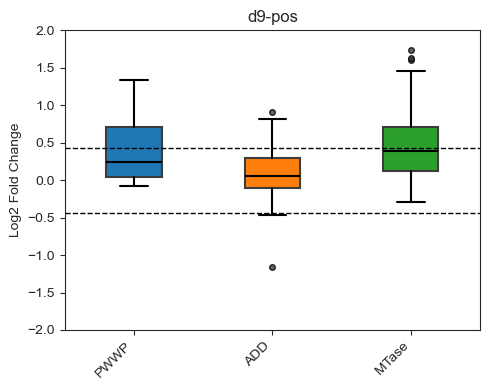

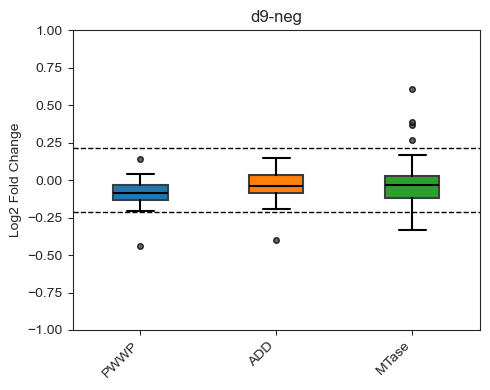

In [16]:
be_scan.plot.plot_boxes(df_filepath       = test_dir + 'NZL10196_v9_comparisons.csv', 
                        plot_column       = 'Domain', 
                        plot_conditions   = ['PWWP', 'ADD', 'MTase'], 
                        y_column          = 'log2_fc', 
                        comparisons       = ['d3-pos', 'd3-neg', 'd6-pos', 'd6-neg', 'd9-pos', 'd9-neg'], 
                        neg_ctrl_col      = 'Gene', 
                        neg_ctrl_category = 'NON-GENE',
                        savefig           = False,
)

## Unit Testing CLI

### be_scan.sgrna 

In [ ]:
gene_filepath = sgrna_dir + "230408_AR_Input.fasta"
genome_file  = "../../../../reference_genomes/GCF_000001405.26/ncbi_dataset/data/GCF_000001405.26/GCF_000001405.26_GRCh38_genomic.fna"
protein_filepath = sgrna_dir + "P10275.fasta"

In [5]:
! python3 -m be_scan generate_BE_guides {gene_filepath} "AR" "SpG" "C" "T"

Create gene object from ../../../tests/test_data/sgrna_data/230408_AR_Input.fasta
Parsing exons: 8 exons found
Preprocessing sucessful


In [6]:
! python3 -m be_scan check_guides "guides.csv" {genome_file}

40116757 lines processed from ../../../../reference_genomes/GCF_000001405.26/ncbi_dataset/data/GCF_000001405.26/GCF_000001405.26_GRCh38_genomic.fna


In [7]:
! python3 -m be_scan annotate_guides "output.csv" "" {protein_filepath} "C" "T"

In [5]:
! python3 -m be_scan guides {gene_filepath} "AR" {genome_file} {protein_filepath} "SpG" "C" "T" 

Create gene object from ../../../tests/test_data/sgrna_data/230408_AR_Input.fasta
Parsing exons: 8 exons found
Preprocessing sucessful
40116757 lines processed from ../../../../reference_genomes/GCF_000001405.26/ncbi_dataset/data/GCF_000001405.26/GCF_000001405.26_GRCh38_genomic.fna


### be_scan.analysis

### be_scan.plot

In [3]:
# plot_scatterplot
! python3 -m be_scan plot_scatterplot -df '../../../tests/test_data/plot_data/NZL10196_v9_comparisons.csv' -x 'Edit_site_3A1' -y 'log2_fc' -hue 'Mut_type' -ncol 'Gene' -ncat 'NON-GENE' --xmin 200  --savefig False -c 'd3-pos' 'd3-neg' 'd6-pos' 'd6-neg' 'd9-pos' 'd9-neg'
### for some reason this still saves figures

# plot_corr_heatmap
! python3 -m be_scan plot_corr_heatmap -df '../../../tests/test_data/plot_data/NZL10196_v9_comparisons.csv' -c 'd3-pos' 'd3-neg' 'd6-pos' 'd6-neg' 'd9-pos' 'd9-neg' --savefig False

# plot_corr_scatterplot
! python3 -m be_scan plot_corr_scatterplot -df '../../../tests/test_data/plot_data/NZL10196_v9_comparisons.csv' -c1 'd3-neg' -c2 'd9-pos' -hue 'Mut_type' --hue_order 'Nonsense' 'Missense' 'Silent' 'Non-exon' 'Splice' 'No_C/Exon' 'No_C/Non-exon' 'Control' --savefig False
### for some reason list_muttypes is not importing so input manually

# plot_boxes
! python3 -m be_scan plot_boxes -df '../../../tests/test_data/plot_data/NZL10196_v9_comparisons.csv' -p 'Domain' -pc 'PWWP' 'ADD' 'MTase' -y 'log2_fc' -c 'd3-pos' 'd3-neg' 'd6-pos' 'd6-neg' 'd9-pos' 'd9-neg' -ncol 'Gene' -ncat "NON-GENE" --savefig False


Figure(800x400)
Figure(800x400)
Figure(800x400)
Figure(800x400)
Figure(800x400)
Figure(800x400)
Figure(400x400)
/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/plot/correlation_scatter.py:90: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.scatterplot(data=df_filtered,
Figure(450x400)
Figure(500x400)
Figure(500x400)
Figure(500x400)
Figure(500x400)
Figure(500x400)
Figure(500x400)


ran <code>python3 -m be_scan plot_scatterplot -df 'tests/test_data/plot_data/NZL10196_v9_comparisons.csv' -x 'Edit_site_3A1' -y 'log2_fc' -hue 'Mut_type' -ncol 'Gene' -ncat 'NON-GENE' --xmin 200  --savefig False -c 'd3-pos' 'd3-neg' 'd6-pos' 'd6-neg' 'd9-pos' 'd9-neg'</code> from terminal <code>be_scan/</code>

ran <code>python3 -m be_scan plot_corr_heatmap -df 'tests/test_data/plot_data/NZL10196_v9_comparisons.csv' -c 'd3-pos' 'd3-neg' 'd6-pos' 'd6-neg' 'd9-pos' 'd9-neg' --savefig False</code> from terminal <code>be_scan/</code>

ran <code>python3 -m be_scan plot_corr_scatterplot -df 'tests/test_data/plot_data/NZL10196_v9_comparisons.csv' -c1 'd3-neg' -c2 'd9-pos' -hue 'Mut_type' --hue_order 'Nonsense' 'Missense' 'Silent' 'Non-exon' 'Splice' 'No_C/Exon' 'No_C/Non-exon' 'Control' --savefig False</code> from terminal <code>be_scan/</code>

ran <code>python3 -m be_scan plot_boxes -df 'tests/test_data/plot_data/NZL10196_v9_comparisons.csv' -p 'Domain' -pc 'PWWP' 'ADD' 'MTase' -y 'log2_fc' -c 'd3-pos' 'd3-neg' 'd6-pos' 'd6-neg' 'd9-pos' 'd9-neg' -ncol 'Gene' -ncat "NON-GENE" --savefig False</code> from terminal <code>be_scan/</code>

## Integration Testing Function Calls

### HDAC Data (MY)

Now trying the analysis and plotting workflow with Megan's HDAC Data

In [18]:
# declaring variables to make commands shorter
in_ref = HDAC_parent_dir + "XYH_annotated_HDAC1_ABE.csv"
HDAC_sample_sheet = HDAC_parent_dir + '231128_HDAC1_batch.csv'
in_lfc = HDAC_parent_dir + "agg_t0_reps.csv"
in_agg = HDAC_parent_dir + "agg_t0_conds.csv"
in_comparisons = HDAC_parent_dir + "comparisons.csv"
keyrev = 'GTTTGAGA'


In [19]:
# option 1
be_scan.analysis.count_reads(
    HDAC_sample_sheet,
    in_ref,
    KEY_REV  = 'GTTTGAGA', 
    file_dir = HDAC_parent_dir
)
be_scan.analysis.merge_and_norm(
    HDAC_sample_sheet,
    in_ref,
    file_dir = HDAC_parent_dir
)
be_scan.analysis.average_reps(
    HDAC_sample_sheet,
    in_lfc,
    file_dir = HDAC_parent_dir
)
be_scan.analysis.compare_conds(
    in_comparisons,
    in_agg,
    file_dir = HDAC_parent_dir
)

# option 2
# be_scan.analysis.batch_process(
#     HDAC_sample_sheet,
#     in_ref,
#     in_comparisons,
#     file_dir = HDAC_parent_dir,
#     KEY_REV  = 'GTTTGAGA', 
# )

../../../../../../Downloads/HDAC_Data/MY381-1_S30_L001_R1_001.fastq processed
../../../../../../Downloads/HDAC_Data/MY381-5_S34_L001_R1_001.fastq processed
../../../../../../Downloads/HDAC_Data/MY381-6_S35_L001_R1_001.fastq processed
../../../../../../Downloads/HDAC_Data/MY381-7_S36_L001_R1_001.fastq processed
../../../../../../Downloads/HDAC_Data/MY381-8_S37_L001_R1_001.fastq processed
../../../../../../Downloads/HDAC_Data/MY381-9_S38_L001_R1_001.fastq processed
../../../../../../Downloads/HDAC_Data/MY381-10_S39_L001_R1_001.fastq processed
Merge and normalize completed
Average reps completed
Compare conditions completed


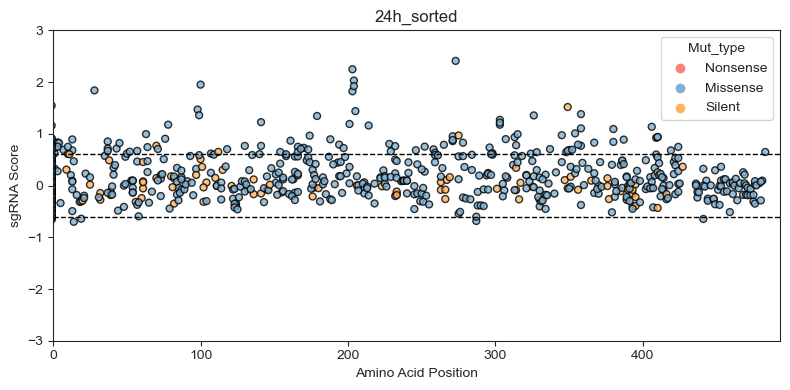

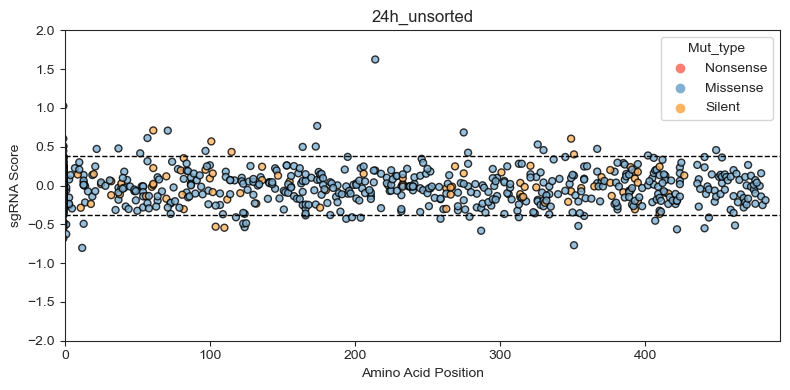

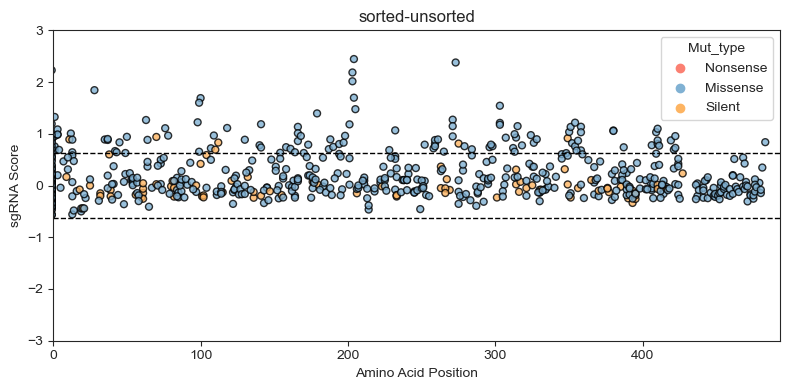

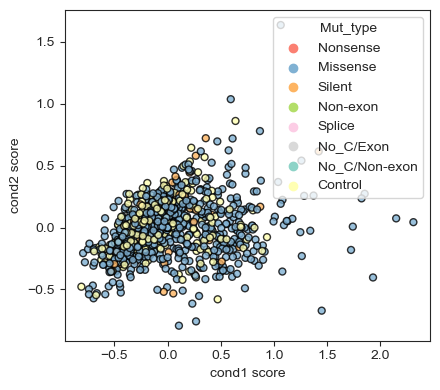

In [20]:
be_scan.plot.plot_scatterplot(df_filepath       = HDAC_parent_dir + 'agg_comps.csv', 
                              x_column          = 'Edit_site', 
                              y_column          = 'log2_fc', 
                              hue_column        = 'Mut_type', 
                              comparisons       = ['24h_sorted', '24h_unsorted', 'sorted-unsorted'], 
                              neg_ctrl_col      = 'Mut_type', 
                              neg_ctrl_category = 'Control',
                              xmin              = 0
                              )

be_scan.plot.plot_corr_scatterplot(df_filepath  = HDAC_parent_dir + 'agg_comps.csv', 
                                   condition1   = '24h_sorted', 
                                   condition2   = '24h_unsorted', 
                                   hue_column   = 'Mut_type',
                                   savefig      = False,
                                   )

### CRAF Data (JW)

In [21]:
# declaring variables to make commands shorter
in_ref = CRAF_parent_dir + 'CRAF_and_cntrls_ref_lib.csv'
CRAF_sample_sheet = CRAF_parent_dir + 'sample_sheet_batch_count_CBE.csv'
in_lfc = CRAF_parent_dir + "agg_t0_reps.csv"
in_agg = CRAF_parent_dir + "agg_t0_conds.csv"
keyrev = 'GTTTGAGA'
in_comparisons = CRAF_parent_dir + "comparisons.csv"

In [22]:
# option 1
be_scan.analysis.count_reads(
    CRAF_sample_sheet,
    in_ref,
    KEY_REV  = 'GTTTGAGA', 
    file_dir = CRAF_parent_dir
)
be_scan.analysis.merge_and_norm(
    CRAF_sample_sheet,
    in_ref,
    file_dir = CRAF_parent_dir
)
be_scan.analysis.average_reps(
    CRAF_sample_sheet,
    in_lfc,
    file_dir = CRAF_parent_dir
)
be_scan.analysis.compare_conds(
    in_comparisons,
    in_agg,
    file_dir = CRAF_parent_dir
)

# option 2
# be_scan.analysis.batch_process(
#     CRAF_sample_sheet,
#     in_ref,
#     in_comparisons,
#     file_dir = CRAF_parent_dir,
#     KEY_REV  = 'GTTTGAGA', 
# )

../../../../../../Downloads/CRAF_Data/JW114-01_S1_L001_R1_001.fastq processed
../../../../../../Downloads/CRAF_Data/JW114-02_S2_L001_R1_001.fastq processed
../../../../../../Downloads/CRAF_Data/JW114-03_S3_L001_R1_001.fastq processed
../../../../../../Downloads/CRAF_Data/JW114-04_S4_L001_R1_001.fastq processed
../../../../../../Downloads/CRAF_Data/JW114-05_S5_L001_R1_001.fastq processed
../../../../../../Downloads/CRAF_Data/JW114-06_S6_L001_R1_001.fastq processed
../../../../../../Downloads/CRAF_Data/JW114-07_S7_L001_R1_001.fastq processed
Merge and normalize completed
Average reps completed
Compare conditions completed


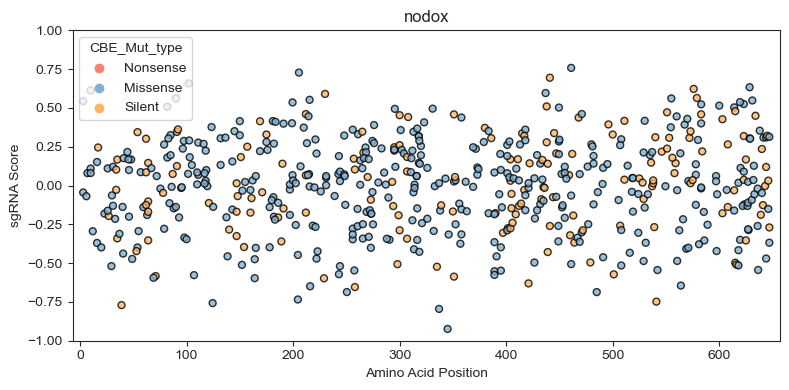

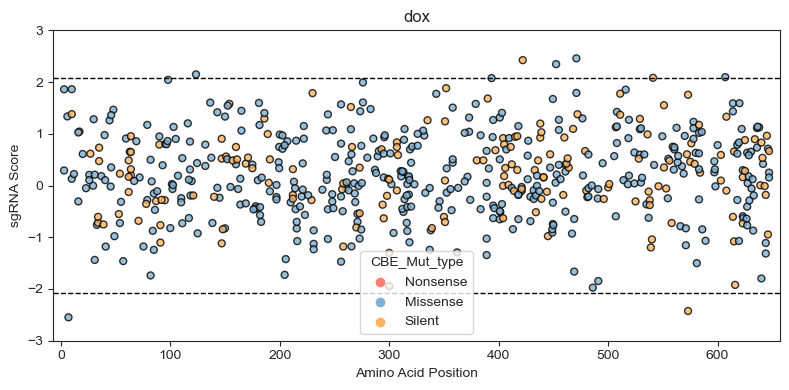

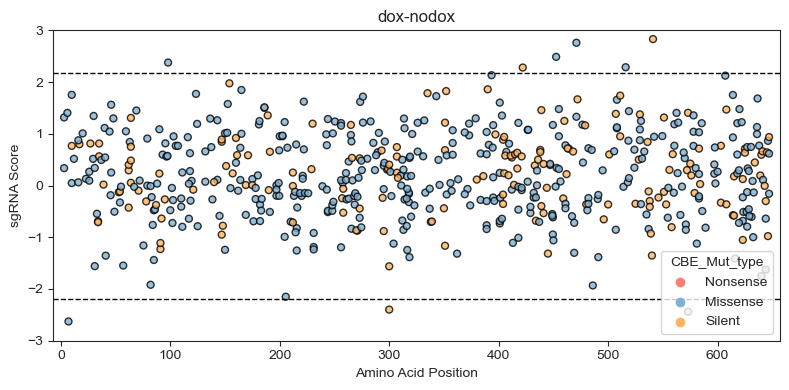

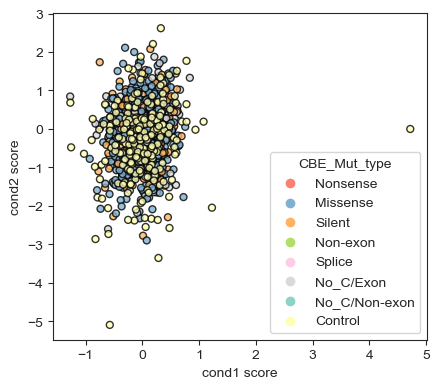

In [23]:
be_scan.plot.plot_scatterplot(df_filepath       = CRAF_parent_dir + 'agg_comps.csv', 
                              x_column          = 'Edit_site', 
                              y_column          = 'log2_fc', 
                              hue_column        = 'CBE_Mut_type', 
                              comparisons       = ['nodox', 'dox', 'dox-nodox'], 
                              neg_ctrl_col      = 'CBE_Mut_type', 
                              neg_ctrl_category = 'Control',

                              )
be_scan.plot.plot_corr_scatterplot(df_filepath  = in_agg, 
                                   condition1   = 'nodox', 
                                   condition2   = 'dox', 
                                   hue_column   = 'CBE_Mut_type',
                                   savefig      = False,
                                   )

### KBTBD4 Data (MY)

In [24]:
# declaring variables to make commands shorter
in_ref = KBTBD4_parent_dir + 'XYH_annotated_KBTBD4_ABE.csv'
KBTBD4_sample_sheet = KBTBD4_parent_dir + '231201_KBTBD4_ABE.csv'
in_lfc = KBTBD4_parent_dir + "agg_t0_reps.csv"
in_agg = KBTBD4_parent_dir + "agg_t0_conds.csv"
in_comparisons = KBTBD4_parent_dir + "comparisons.csv"
keyrev = 'GTTTGAGA'

In [25]:
# option 1
be_scan.analysis.count_reads(
    KBTBD4_sample_sheet,
    in_ref,
    KEY_REV  = 'GTTTGAGA', 
    file_dir = KBTBD4_parent_dir
)
be_scan.analysis.merge_and_norm(
    KBTBD4_sample_sheet,
    in_ref,
    file_dir = KBTBD4_parent_dir
)
be_scan.analysis.average_reps(
    KBTBD4_sample_sheet,
    in_lfc,
    file_dir = KBTBD4_parent_dir
)
be_scan.analysis.compare_conds(
    in_comparisons,
    in_agg,
    file_dir = KBTBD4_parent_dir
)

# option 2
# be_scan.analysis.batch_process(
#     KBTBD4_sample_sheet,
#     in_ref,
#     in_comparisons,
#     file_dir = KBTBD4_parent_dir,
#     KEY_REV  = 'GTTTGAGA', 
# )

../../../../../../Downloads/KBTBD4/Plasmid-lib_S7_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Unsorted-1-ABE_S11_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Unsorted-2-ABE_S12_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Unsorted-3-ABE_S13_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Sorted-1-ABE_S14_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Sorted-2-ABE_S15_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Sorted-3-ABE_S16_L001_R1_001.fastq.gz processed
Merge and normalize completed
Average reps completed
Compare conditions completed


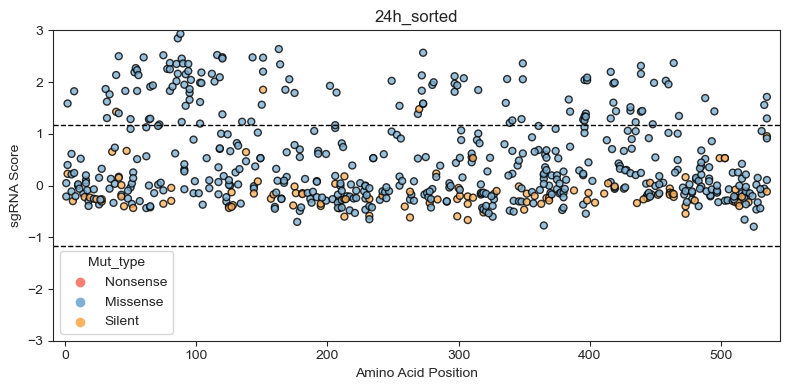

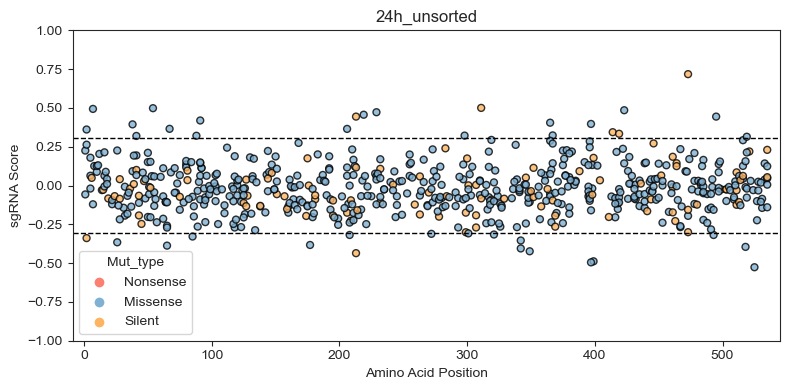

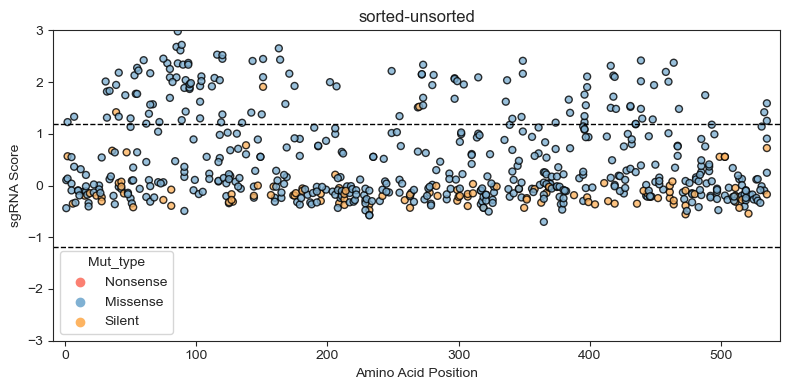

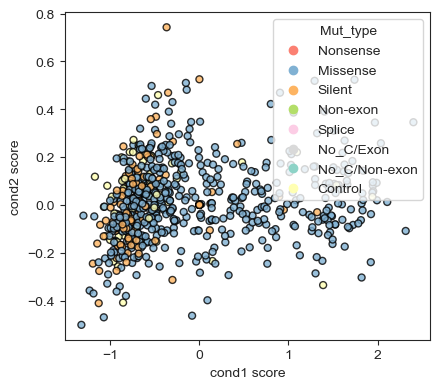

In [26]:
be_scan.plot.plot_scatterplot(df_filepath       = KBTBD4_parent_dir + "agg_comps.csv", 
                              x_column          = 'Edit_site', 
                              y_column          = 'log2_fc', 
                              hue_column        = 'Mut_type', 
                              comparisons       = ['24h_sorted', "24h_unsorted", 'sorted-unsorted'], 
                              neg_ctrl_col      = 'Mut_type', 
                              neg_ctrl_category = 'Control',
                              savefig           = False,
                              )
be_scan.plot.plot_corr_scatterplot(df_filepath  = in_agg, 
                                   condition1   = '24h_sorted', 
                                   condition2   = '24h_unsorted', 
                                   hue_column   = 'Mut_type',
                                   savefig      = False,
                                   )

In [27]:
# declaring variables to make commands shorter
in_ref = KBTBD4_parent_dir + 'XYH_annotated_KBTBD4_CBE.csv'
KBTBD4_sample_sheet = KBTBD4_parent_dir + '231201_KBTBD4_CBE.csv'
in_lfc = KBTBD4_parent_dir + "agg_t0_reps.csv"
in_agg = KBTBD4_parent_dir + "agg_t0_conds.csv"
in_comparisons = KBTBD4_parent_dir + "comparisons.csv"
keyrev = 'GTTTGAGA'

In [28]:
# option 1
be_scan.analysis.count_reads(
    KBTBD4_sample_sheet,
    in_ref,
    KEY_REV  = 'GTTTGAGA', 
    file_dir = KBTBD4_parent_dir
)
be_scan.analysis.merge_and_norm(
    KBTBD4_sample_sheet,
    in_ref,
    file_dir = KBTBD4_parent_dir
)
be_scan.analysis.average_reps(
    KBTBD4_sample_sheet,
    in_lfc,
    file_dir = KBTBD4_parent_dir
)
be_scan.analysis.compare_conds(
    in_comparisons,
    in_agg,
    file_dir = KBTBD4_parent_dir
)

# option 2
be_scan.analysis.batch_process(
    KBTBD4_sample_sheet,
    in_ref,
    in_comparisons,
    file_dir = KBTBD4_parent_dir,
    KEY_REV  = 'GTTTGAGA', 
)

../../../../../../Downloads/KBTBD4/Plasmid-lib-CBE_S17_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Unsorted-1-CBE_S21_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Unsorted-2-CBE_S22_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Unsorted-3-CBE_S23_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Sorted-1-CBE_S24_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Sorted-2-CBE_S25_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Sorted-3-CBE_S26_L001_R1_001.fastq.gz processed
Merge and normalize completed
Average reps completed
Compare conditions completed
../../../../../../Downloads/KBTBD4/Plasmid-lib-CBE_S17_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Unsorted-1-CBE_S21_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Unsorted-2-CBE_S22_L001_R1_001.fastq.gz processed
../../../../../../Downloads/KBTBD4/Unsorted-3-CBE_S23_L001_R1_001.fastq.

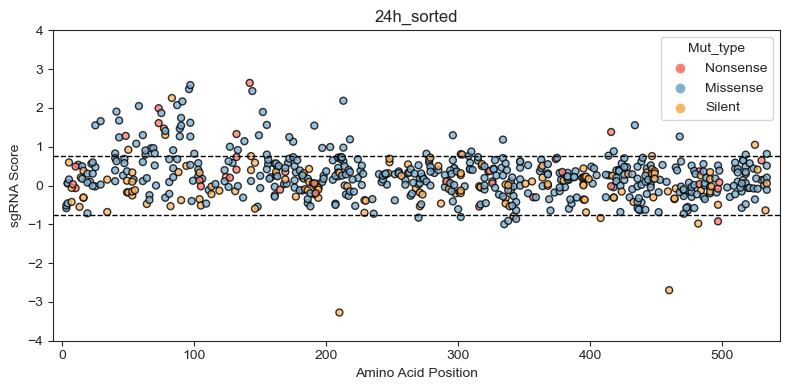

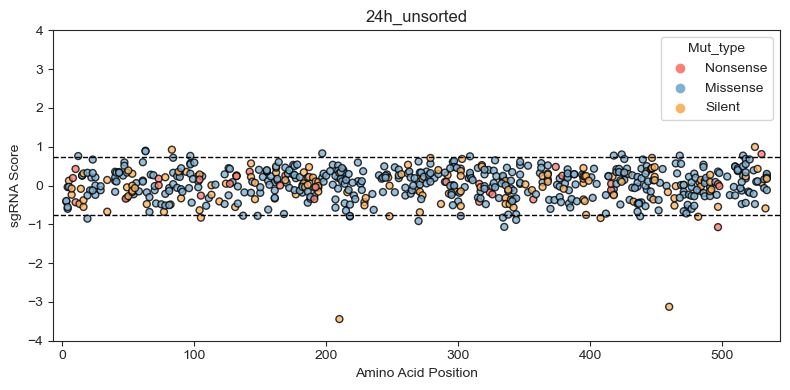

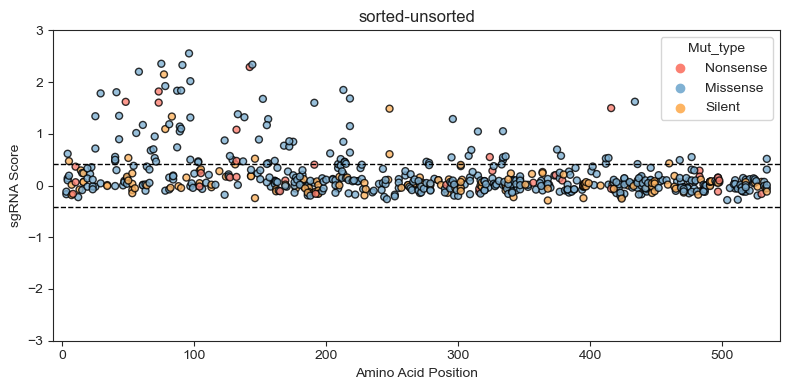

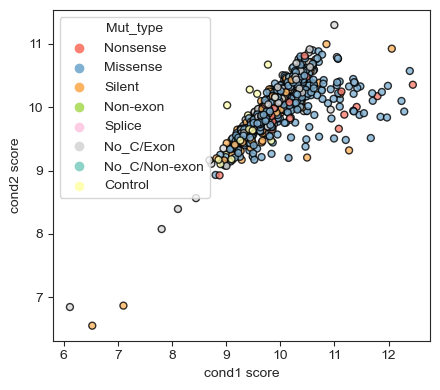

In [29]:
be_scan.plot.plot_scatterplot(df_filepath       = KBTBD4_parent_dir + "agg_comps.csv", 
                              x_column          = 'Edit_site', 
                              y_column          = 'log2_fc', 
                              hue_column        = 'Mut_type', 
                              comparisons       = ['24h_sorted', "24h_unsorted", 'sorted-unsorted'], 
                              neg_ctrl_col      = 'Mut_type', 
                              neg_ctrl_category = 'Control',
                              savefig           = False,
                              )
be_scan.plot.plot_corr_scatterplot(df_filepath  = in_agg, 
                                   condition1   = '24h_sorted', 
                                   condition2   = '24h_unsorted', 
                                   hue_column   = 'Mut_type',
                                   savefig      = False,
                                   )

## Integration Testing CLI

### Integration Testing HDAC Data

In [30]:
# declaring variables to make commands shorter
in_ref = HDAC_parent_dir + "XYH_annotated_HDAC1_ABE.csv"
HDAC_sample_sheet = HDAC_parent_dir + '231128_HDAC1_batch.csv'
in_lfc = HDAC_parent_dir + "agg_t0_reps.csv"
in_agg = HDAC_parent_dir + "agg_t0_conds.csv"
keyrev = 'GTTTGAGA'
in_comparisons = HDAC_parent_dir + "comparisons.csv"
out = HDAC_parent_dir + "agg_comps.csv"

In [31]:
# option 1
! python3 -m be_scan count_reads {HDAC_sample_sheet} {in_ref} --KEY_REV {keyrev} --file_dir {HDAC_parent_dir}
! python3 -m be_scan merge_and_norm {HDAC_sample_sheet} {in_ref} --file_dir {HDAC_parent_dir}
! python3 -m be_scan average_reps {HDAC_sample_sheet} {in_lfc} --file_dir {HDAC_parent_dir}
! python3 -m be_scan compare_conds {in_comparisons} {in_agg} --file_dir {HDAC_parent_dir}
! python3 -m be_scan plot_scatterplot -df {out} -x 'Edit_site' -y 'log2_fc' -hue 'Mut_type' -ncol 'Mut_type' -ncat 'Control' --xmin 0 -c '24h_sorted' '24h_unsorted' 'sorted-unsorted'

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/__main__.py", line 10, in <module>
    main()
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/main.py", line 240, in main
    from be_scan.sgrna.findall_be import add_parser_args, main as findall_be_main
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/sgrna/findall_be.py", line 13, in <module>
    from be_scan.sgrna.generate_guides import identify_BE_guides, annotate_BE_guides
ImportError: cannot import name 'identify_BE_guides' from 'be_scan.sgrna.generate_guides' (/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/sgrna/generate_guides.py)
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/__main__.py", line 10, in <module>
  

In [32]:
# option 2
! python3 -m be_scan batch_process {HDAC_sample_sheet} {in_ref} {in_comparisons} --KEY_REV {keyrev} --file_dir {HDAC_parent_dir}
! python3 -m be_scan plot_scatterplot -df {out} -x 'Edit_site' -y 'log2_fc' -hue 'Mut_type' -ncol 'Mut_type' -ncat 'Control' --xmin 0 -c '24h_sorted' '24h_unsorted' 'sorted-unsorted'

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/__main__.py", line 10, in <module>
    main()
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/main.py", line 240, in main
    from be_scan.sgrna.findall_be import add_parser_args, main as findall_be_main
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/sgrna/findall_be.py", line 13, in <module>
    from be_scan.sgrna.generate_guides import identify_BE_guides, annotate_BE_guides
ImportError: cannot import name 'identify_BE_guides' from 'be_scan.sgrna.generate_guides' (/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/sgrna/generate_guides.py)
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/__main__.py", line 10, in <module>
  

### Integration Testing CRAF Data

In [33]:
# declaring variables to make commands shorter
in_ref = CRAF_parent_dir + 'CRAF_and_cntrls_ref_lib.csv'
CRAF_sample_sheet = CRAF_parent_dir + 'sample_sheet_batch_count_CBE.csv'
in_lfc = CRAF_parent_dir + "agg_t0_reps.csv"
in_agg = CRAF_parent_dir + "agg_t0_conds.csv"
keyrev = 'GTTTGAGA'
in_comparisons = CRAF_parent_dir + "comparisons.csv"
out = CRAF_parent_dir + "agg_comps.csv"

In [34]:
# option 1
! python3 -m be_scan count_reads {CRAF_sample_sheet} {in_ref} --KEY_REV {keyrev} --file_dir {CRAF_parent_dir}
! python3 -m be_scan merge_and_norm {CRAF_sample_sheet} {in_ref} --file_dir {CRAF_parent_dir}
! python3 -m be_scan average_reps {CRAF_sample_sheet} {in_lfc} --file_dir {CRAF_parent_dir}
! python3 -m be_scan compare_conds {in_comparisons} {in_agg} --file_dir {CRAF_parent_dir}
! python3 -m be_scan plot_scatterplot -df {out} -x 'Edit_site' -y 'log2_fc' -hue 'CBE_Mut_type' -ncol 'CBE_Mut_type' -ncat 'Control' --xmin 1 -c 'nodox' 'dox' 'dox-nodox'


Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/__main__.py", line 10, in <module>
    main()
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/main.py", line 240, in main
    from be_scan.sgrna.findall_be import add_parser_args, main as findall_be_main
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/sgrna/findall_be.py", line 13, in <module>
    from be_scan.sgrna.generate_guides import identify_BE_guides, annotate_BE_guides
ImportError: cannot import name 'identify_BE_guides' from 'be_scan.sgrna.generate_guides' (/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/sgrna/generate_guides.py)
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/__main__.py", line 10, in <module>
  

In [35]:
# option 2
! python3 -m be_scan batch_process {CRAF_sample_sheet} {in_ref} {in_comparisons} --KEY_REV {keyrev} --file_dir {CRAF_parent_dir}
! python3 -m be_scan plot_scatterplot -df {out} -x 'Edit_site' -y 'log2_fc' -hue 'CBE_Mut_type' -ncol 'CBE_Mut_type' -ncat 'Control' --xmin 1 -c 'nodox' 'dox' 'dox-nodox'

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/__main__.py", line 10, in <module>
    main()
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/main.py", line 240, in main
    from be_scan.sgrna.findall_be import add_parser_args, main as findall_be_main
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/sgrna/findall_be.py", line 13, in <module>
    from be_scan.sgrna.generate_guides import identify_BE_guides, annotate_BE_guides
ImportError: cannot import name 'identify_BE_guides' from 'be_scan.sgrna.generate_guides' (/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/sgrna/generate_guides.py)
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/__main__.py", line 10, in <module>
  

### Integration Testing KBTBD4

In [36]:
# declaring variables to make commands shorter
in_ref = KBTBD4_parent_dir + 'XYH_annotated_KBTBD4_ABE.csv'
KBTBD4_sample_sheet = KBTBD4_parent_dir + '231201_KBTBD4_ABE.csv'
in_lfc = KBTBD4_parent_dir + "agg_t0_reps.csv"
in_agg = KBTBD4_parent_dir + "agg_t0_conds.csv"
keyrev = 'GTTTGAGA'
in_comparisons = KBTBD4_parent_dir + "comparisons.csv"
out = KBTBD4_parent_dir + "agg_comps.csv"

In [37]:
# option 1
! python3 -m be_scan count_reads {KBTBD4_sample_sheet} {in_ref} --KEY_REV {keyrev} --file_dir {KBTBD4_parent_dir}
! python3 -m be_scan merge_and_norm {KBTBD4_sample_sheet} {in_ref} --file_dir {KBTBD4_parent_dir}
! python3 -m be_scan average_reps {KBTBD4_sample_sheet} {in_lfc} --file_dir {KBTBD4_parent_dir}
! python3 -m be_scan compare_conds {in_comparisons} {in_agg} --file_dir {KBTBD4_parent_dir}
! python3 -m be_scan plot_scatterplot -df {out} -x 'Edit_site' -y 'log2_fc' -hue 'Mut_type' -ncol 'Mut_type' -ncat 'Control' --xmin 0 -c '24h_sorted' '24h_unsorted' 'sorted-unsorted'

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/__main__.py", line 10, in <module>
    main()
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/main.py", line 240, in main
    from be_scan.sgrna.findall_be import add_parser_args, main as findall_be_main
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/sgrna/findall_be.py", line 13, in <module>
    from be_scan.sgrna.generate_guides import identify_BE_guides, annotate_BE_guides
ImportError: cannot import name 'identify_BE_guides' from 'be_scan.sgrna.generate_guides' (/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/sgrna/generate_guides.py)
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/__main__.py", line 10, in <module>
  

In [38]:
# option 2
! python3 -m be_scan batch_process {KBTBD4_sample_sheet} {in_ref} {in_comparisons} --KEY_REV {keyrev} --file_dir {KBTBD4_parent_dir}
! python3 -m be_scan plot_scatterplot -df {out} -x 'Edit_site' -y 'log2_fc' -hue 'Mut_type' -ncol 'Mut_type' -ncat 'Control' --xmin 0 -c '24h_sorted' '24h_unsorted' 'sorted-unsorted'

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/__main__.py", line 10, in <module>
    main()
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/main.py", line 240, in main
    from be_scan.sgrna.findall_be import add_parser_args, main as findall_be_main
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/sgrna/findall_be.py", line 13, in <module>
    from be_scan.sgrna.generate_guides import identify_BE_guides, annotate_BE_guides
ImportError: cannot import name 'identify_BE_guides' from 'be_scan.sgrna.generate_guides' (/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/sgrna/generate_guides.py)
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/__main__.py", line 10, in <module>
  

In [39]:
# declaring variables to make commands shorter
in_ref = KBTBD4_parent_dir + 'XYH_annotated_KBTBD4_CBE.csv'
KBTBD4_sample_sheet = KBTBD4_parent_dir + '231201_KBTBD4_CBE.csv'
in_lfc = KBTBD4_parent_dir + "agg_t0_reps.csv"
in_agg = KBTBD4_parent_dir + "agg_t0_conds.csv"
keyrev = 'GTTTGAGA'
in_comparisons = KBTBD4_parent_dir + "comparisons.csv"
out = KBTBD4_parent_dir + "agg_comps.csv"

In [40]:
# option 1
! python3 -m be_scan count_reads {KBTBD4_sample_sheet} {in_ref} --KEY_REV {keyrev} --file_dir {KBTBD4_parent_dir}
! python3 -m be_scan merge_and_norm {KBTBD4_sample_sheet} {in_ref} --file_dir {KBTBD4_parent_dir}
! python3 -m be_scan average_reps {KBTBD4_sample_sheet} {in_lfc} --file_dir {KBTBD4_parent_dir}
! python3 -m be_scan compare_conds {in_comparisons} {in_agg} --file_dir {KBTBD4_parent_dir}
! python3 -m be_scan plot_scatterplot -df {out} -x 'Edit_site' -y 'log2_fc' -hue 'Mut_type' -ncol 'Mut_type' -ncat 'Control' --xmin 0 -c '24h_sorted' '24h_unsorted' 'sorted-unsorted'

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/__main__.py", line 10, in <module>
    main()
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/main.py", line 240, in main
    from be_scan.sgrna.findall_be import add_parser_args, main as findall_be_main
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/sgrna/findall_be.py", line 13, in <module>
    from be_scan.sgrna.generate_guides import identify_BE_guides, annotate_BE_guides
ImportError: cannot import name 'identify_BE_guides' from 'be_scan.sgrna.generate_guides' (/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/sgrna/generate_guides.py)
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/__main__.py", line 10, in <module>
  

In [41]:
# option 2
! python3 -m be_scan batch_process {KBTBD4_sample_sheet} {in_ref} {in_comparisons} --KEY_REV {keyrev} --file_dir {KBTBD4_parent_dir}
! python3 -m be_scan plot_scatterplot -df {out} -x 'Edit_site' -y 'log2_fc' -hue 'Mut_type' -ncol 'Mut_type' -ncat 'Control' --xmin 0 -c '24h_sorted' '24h_unsorted' 'sorted-unsorted'

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/__main__.py", line 10, in <module>
    main()
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/main.py", line 240, in main
    from be_scan.sgrna.findall_be import add_parser_args, main as findall_be_main
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/sgrna/findall_be.py", line 13, in <module>
    from be_scan.sgrna.generate_guides import identify_BE_guides, annotate_BE_guides
ImportError: cannot import name 'identify_BE_guides' from 'be_scan.sgrna.generate_guides' (/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/sgrna/generate_guides.py)
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/calvinxyh/Documents/GitHub/be_scan/be_scan/__main__.py", line 10, in <module>
  